In [3]:
import pyforest
import minna_functions as mf

In [1]:
df = pd.read_csv('data.csv')

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [4]:
clean_df = mf.clean_data(df)

In [5]:
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_lg')

In [10]:
clean_df['token_body'] = [nlp(clean_df['Body'][i]) for i in range(0, len(clean_df))]

In [49]:
real_articles = clean_df.loc[clean_df['Label'] == 1]
real_articles.reset_index(inplace = True)
real_articles.drop('index', axis = 1, inplace = True)

fake_articles = clean_df.loc[clean_df['Label'] == 0]
fake_articles.reset_index(inplace = True)
fake_articles.drop('index', axis = 1, inplace = True)

In [56]:
len(fake_articles)

1535

In [27]:
#clean_df['token_headline'] = [ nlp(clean_df['Headline'][i]) for i in range(0, len(clean_df))]

In [14]:
from itertools import chain
from collections import Counter
import operator
import string

In [15]:
nlp.vocab["’"].is_stop = True

In [16]:
nlp.vocab["’"].is_stop == True

True

In [17]:
vector_words_all = []
for i in range(len(clean_df)):
    vector_words_all.append(clean_df['token_body'][i])
    
list_words = list(chain.from_iterable(vector_words_all))
  
counts = Counter()
for token in list_words:
    if token.is_stop == False and token.is_punct == False:
        counts[token.lemma_] += 1
        
counts = dict(counts)
counts = dict(sorted(counts.items(), key=operator.itemgetter(1),reverse=True))

In [18]:
counts_df = pd.DataFrame.from_dict(counts, orient='index')

In [19]:
counts_df.reset_index(inplace = True)
counts_df.columns = ['word','number']
counts_df.head(10)

,word,number
0,say,10195
1,’s,7737
2,year,3482
3,Trump,2658
4,time,2537
5,like,2481
6,people,2478
7,’,2319
8,not,2109
9,come,2040


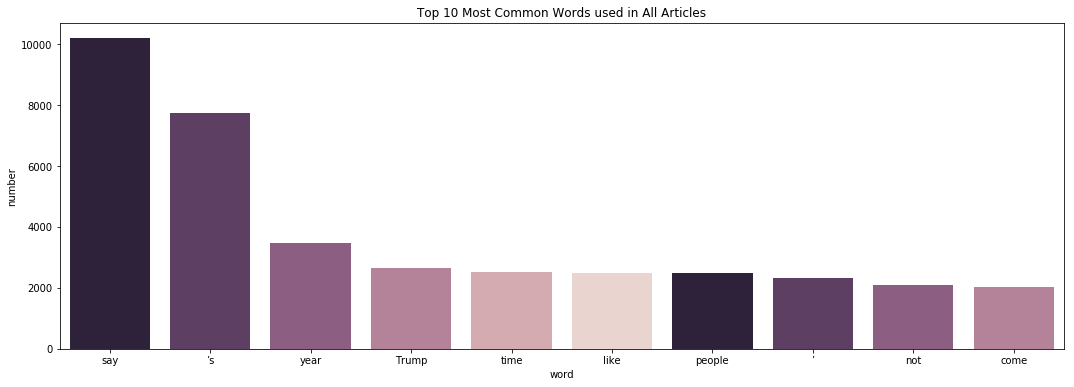

In [21]:
fig = plt.figure(figsize=(18,6))
sns.barplot(x=counts_df.word[:10], y=counts_df.number[:10], palette=sns.cubehelix_palette(reverse = True))
plt.title('Top 10 Most Common Words used in All Articles')
plt.show()

In [58]:
def words_count_dataframe(df):
    vector_words_all = []
    for i in range(len(df)):
        vector_words_all.append(df['token_body'][i])

    list_words = list(chain.from_iterable(vector_words_all))

    counts = Counter()
    for token in list_words:
        if token.is_stop == False and token.is_punct == False:
            counts[token.lemma_] += 1

    counts = dict(counts)
    counts = dict(sorted(counts.items(), key=operator.itemgetter(1),reverse=True))
    
    counts_df = pd.DataFrame.from_dict(counts, orient='index')
    counts_df.reset_index(inplace = True)
    counts_df.columns = ['word','number']
    
    return counts_df

In [65]:
real_article_counts = words_count_dataframe(real_articles)

In [66]:
fake_article_counts = words_count_dataframe(fake_articles)

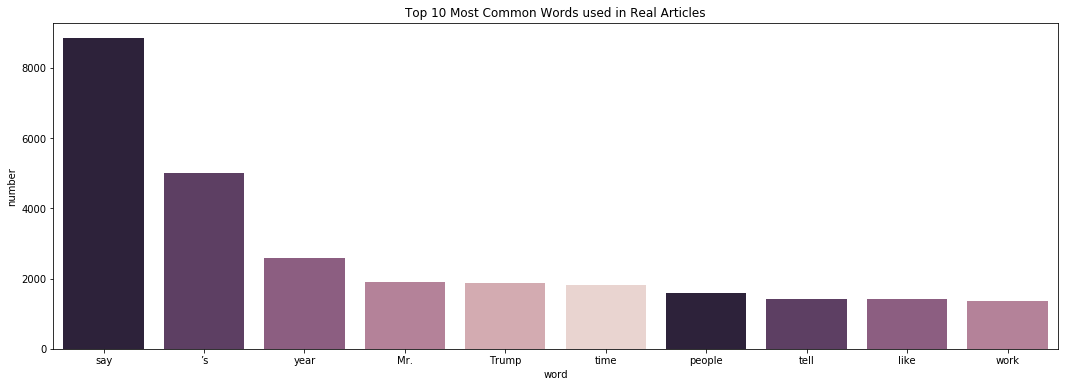

In [67]:
fig = plt.figure(figsize=(18,6))
sns.barplot(x=real_article_counts.word[:10], y=real_article_counts.number[:10], palette=sns.cubehelix_palette(reverse = True))
plt.title('Top 10 Most Common Words used in Real Articles')
plt.show()

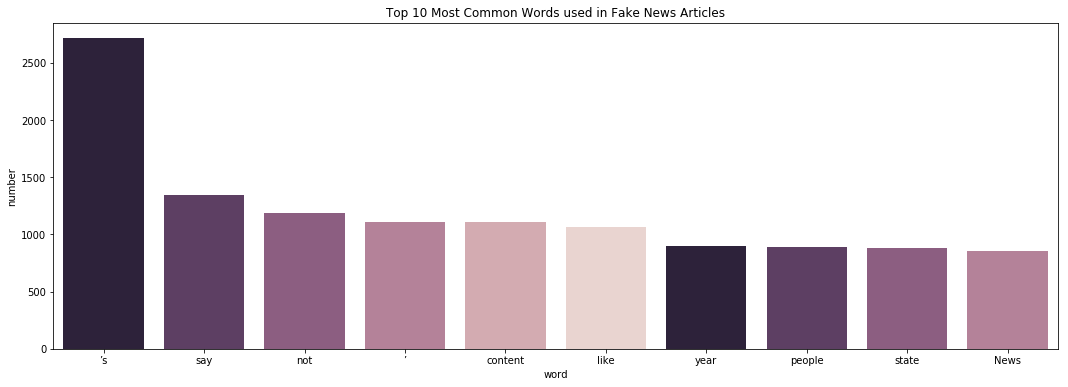

In [68]:
fig = plt.figure(figsize=(18,6))
sns.barplot(x=fake_article_counts.word[:10], y=fake_article_counts.number[:10], palette=sns.cubehelix_palette(reverse = True))
plt.title('Top 10 Most Common Words used in Fake News Articles')
plt.show()